In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder = 'chest_xray'
classes = ['NORMAL', 'PNEUMONIA']
num_classes = len(classes)

def load_data(variety):
    result = {}
    for _class in classes:
        result[_class] = []
        path = os.path.join(folder, variety, _class)
        for file in os.listdir(path):
            img = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
            result[_class].append(img)
    return result
        
train = load_data('/content/drive/MyDrive/607/chest_xray/train')
test = load_data('/content/drive/MyDrive/607/chest_xray/test')
val = load_data('/content/drive/MyDrive/607/chest_xray/val')

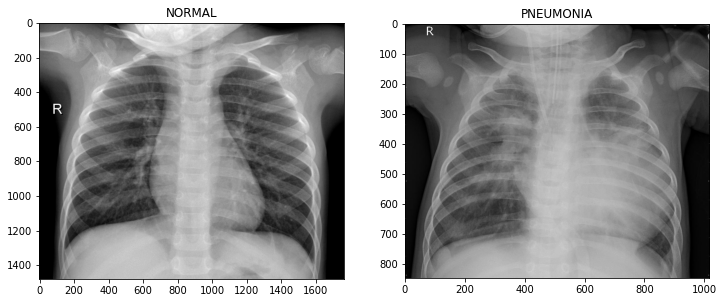

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for ax, label in zip(axs, classes):
    ax.imshow(train[label][3], cmap='gray')
    ax.set_title(label)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_filenames = train_test_split(train, test_size=0.2)